In [3]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

In [4]:
with zipfile.ZipFile('IDCJAC0010_073032_1800.zip').open('IDCJAC0010_073032_1800_Data.csv') as data:
    df_qandialla = pd.read_csv(data)

In [5]:
with zipfile.ZipFile('IDCJAC0010_073038_1800.zip').open('IDCJAC0010_073038_1800_Data.csv') as data:
    df_research = pd.read_csv(data)

In [6]:
with zipfile.ZipFile('IDCJAC0010_073151_1800.zip').open('IDCJAC0010_073151_1800_Data.csv') as data:
    df_airport = pd.read_csv(data)

In [7]:
print(df_qandialla["Year"].min(), df_qandialla["Year"].max())
print(df_research["Year"].min(), df_research["Year"].max())
print(df_airport["Year"].min(), df_airport["Year"].max())

1965 2014
1965 2005
2005 2020


In [8]:
df_temora = pd.concat(
    [df_research, df_airport.iloc[31:]]
).drop([
    "Product code", 
    "Bureau of Meteorology station number", 
    "Days of accumulation of maximum temperature",
    "Quality"
], axis=1)

In [9]:
# we don't care about any other months except Sep, Oct & Nov
df_temora["Days of Spring"] = df_temora["Month"].map({9:0, 10:30, 11:61}) + df_temora["Day"]

In [10]:
first_hot_day_in_spring = df_temora[
    (df_temora["Month"].isin([9, 10, 11])) & 
    (df_temora["Maximum temperature (Degree C)"] > 30)
].groupby("Year").first().reset_index()

In [11]:
first_hot_day_in_spring

Year  Month  Day  Maximum temperature (Degree C)  Days of Spring
0   1965      9   25                            30.8            25.0
1   1966     11   20                            31.7            81.0
2   1967     10   17                            30.6            47.0
3   1968     10   17                            31.7            47.0
4   1969     11   17                            30.5            78.0
5   1970     11   10                            30.8            71.0
6   1971     11    5                            30.1            66.0
7   1972     11    8                            30.2            69.0
8   1973      9   30                            30.5            30.0
9   1974     11   11                            32.2            72.0
10  1975     11   19                            33.6            80.0
11  1976     11   11                            31.3            72.0
12  1977     10   11                            31.5            41.0
13  1978     11   17                            31.9            78.0
14  1979     10   21                            31.1            51.0
15  1980      9   30                            33.4            30.0
16  1981      9   18                            30.9            18.0
17  1982     10   26                            32.3            56.0
18  1983     10   27                            30.2            57.0
19  1984     10   14                            30.1            44.0
20  1985     11   14                            30.8            75.0
21  1986     11    4                            31.1            65.0
22  1987     10   31                            31.4            61.0
23  1988     10   20                            32.2            50.0
24  1989     11    5                            30.6            66.0
25  1990     10   28                            30.5            58.0
26  1991     10   15                            31.3            45.0
27  1992     11   20                            30.5            81.0
28  1993     11   17                            31.2            78.0
29  1994     10   16                            32.0            46.0
30  1995     10   19                            31.0            49.0
31  1996     10   11                            30.8            41.0
32  1997     10   25                            32.3            55.0
33  1998     11    5                            30.5            66.0
34  1999     11   30                            31.8            91.0
35  2000     10    6                            32.0            36.0
36  2001     11   17                            31.2            78.0
37  2002     10   16                            30.2            46.0
38  2003     11    5                            30.5            66.0
39  2004     10   12                            33.5            42.0
40  2005     11    2                            30.3            63.0
41  2006     10   12                            33.6            42.0
42  2007     10   11                            30.7            41.0
43  2008     10    2                            32.6            32.0
44  2009      9   13                            30.8            13.0
45  2010     11   11                            30.6            72.0
46  2011     10   21                            30.2            51.0
47  2012     10    4                            30.1            34.0
48  2013     10    6                            30.6            36.0
49  2014     10    5                            32.8            35.0
50  2015     10    4                            31.0            34.0
51  2016     11    7                            30.4            68.0
52  2017      9   23                            32.5            23.0
53  2018     10   19                            30.4            49.0
54  2019     10    3                            32.4            33.0

In [12]:
trendline = poly.Polynomial.fit(first_hot_day_in_spring.index, first_hot_day_in_spring["Days of Spring"], 1)
first_hot_day_in_spring["trendline"] = first_hot_day_in_spring.index.map(trendline)

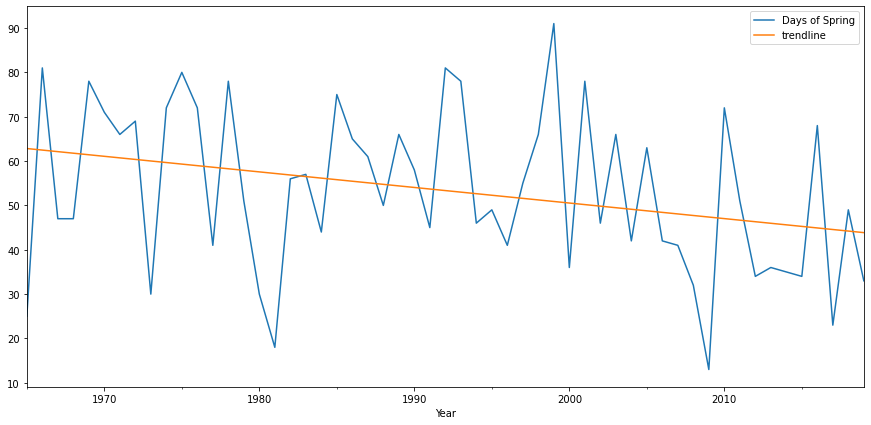

In [13]:
plt.rcParams['figure.figsize'] = [15, 7]
plot_projection = first_hot_day_in_spring.drop(["Month", "Day", "Maximum temperature (Degree C)"], axis=1)
plot_projection.Year = pd.to_datetime(plot_projection.Year, format="%Y")
plot_projection = plot_projection.set_index("Year", drop=True)
plot_projection
bar_graph = plot_projection.plot()